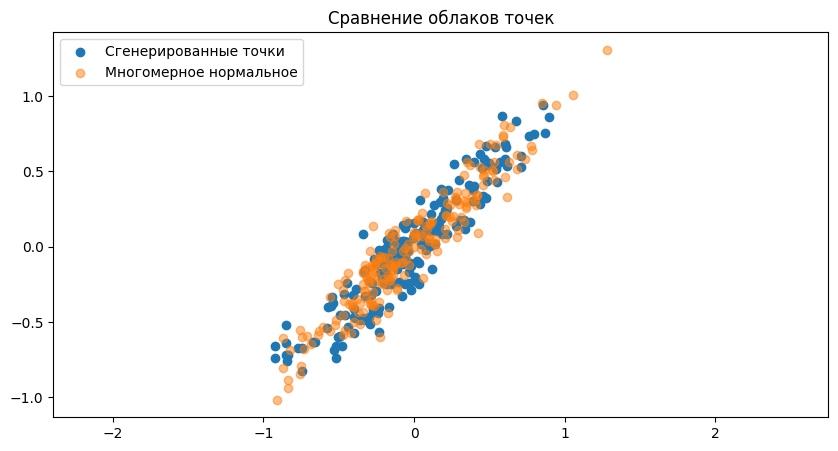

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
angle = np.pi / 4 

# Матрица поворота
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                             [np.sin(angle), np.cos(angle)]])

# Поворот данных
X_rotated = X @ rotation_matrix

# Матрица ковариации
cov_matrix = np.cov(X_rotated, rowvar=False)

# Сравнение с np.random.multivariate_normal
mean = np.mean(X_rotated, axis=0)
cov = np.cov(X_rotated, rowvar=False)
X_multivariate = np.random.multivariate_normal(mean, cov, M)

# Визуализация
plt.figure(figsize=(10, 5))
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], label='Сгенерированные точки')
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], label='Многомерное нормальное', alpha=0.5)
plt.axis('equal')
plt.legend()
plt.title('Сравнение облаков точек')
plt.show()

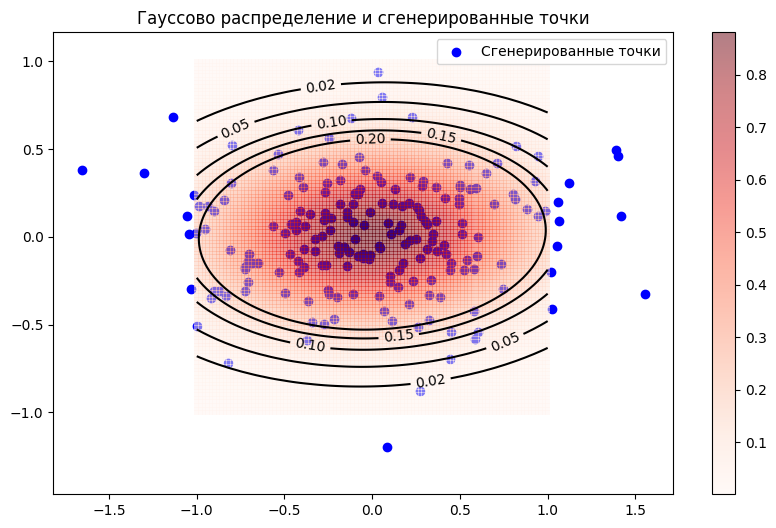

In [3]:
from scipy.stats import multivariate_normal

# Генерация данных
M = 200
mean = [0, 0]
cov = [[0.3, 0], [0, 0.1]]
data = np.random.multivariate_normal(mean, cov, M)

# Среднее и матрица ковариации
mu = np.mean(data, axis=0)
C = np.cov(data, rowvar=False)

# Оценка плотности вероятности
xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=mu, cov=C)
ZZ = m.pdf(pp).reshape(XX.shape)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], label='Сгенерированные точки', color='blue')
IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='Reds', alpha=0.5)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=[0.02, 0.05, 0.1, 0.15, 0.2], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Гауссово распределение и сгенерированные точки')
plt.axis('equal')
plt.legend()
plt.show()

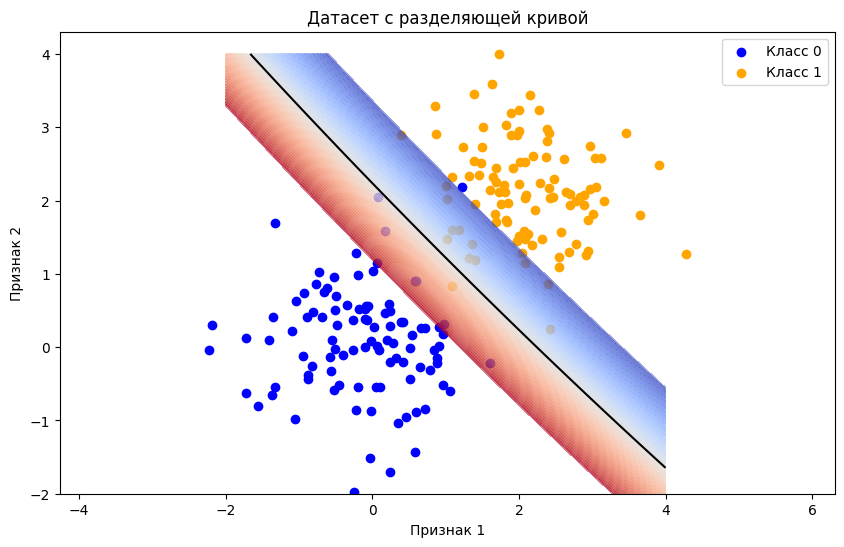

In [5]:
from scipy.stats import multivariate_normal

# Параметры
M = 200
mean0 = [0, 0]
cov0 = [[0.5, 0], [0, 0.5]]
mean1 = [2, 2]
cov1 = [[0.5, 0], [0, 0.5]]

# Генерация данных
class0 = np.random.multivariate_normal(mean0, cov0, M // 2)
class1 = np.random.multivariate_normal(mean1, cov1, M // 2)

# Средние значения и матрицы ковариации
mu0 = np.mean(class0, axis=0)
C0 = np.cov(class0, rowvar=False)

mu1 = np.mean(class1, axis=0)
C1 = np.cov(class1, rowvar=False)

# Создание сетки для вычисления логарифмов вероятностей
xx = np.linspace(-2, 4, 100)
yy = np.linspace(-2, 4, 100)
XX, YY = np.meshgrid(xx, yy)

# Вычисление вероятностей
pdf0 = multivariate_normal.pdf(np.dstack((XX, YY)), mean=mu0, cov=C0)
pdf1 = multivariate_normal.pdf(np.dstack((XX, YY)), mean=mu1, cov=C1)

# Разность логарифмов вероятностей
log_diff = np.log(pdf0) - np.log(pdf1)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Класс 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Класс 1')

# Фон в зависимости от разности логарифмов
plt.contourf(XX, YY, log_diff, levels=np.linspace(-5, 5, 100), cmap='coolwarm', alpha=0.5)

# Построение разделяющей кривой (нулевая разница)
plt.contour(XX, YY, log_diff, levels=[0], colors='black')

# Настройки графика
plt.title('Датасет с разделяющей кривой')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.axis('equal')
plt.show()

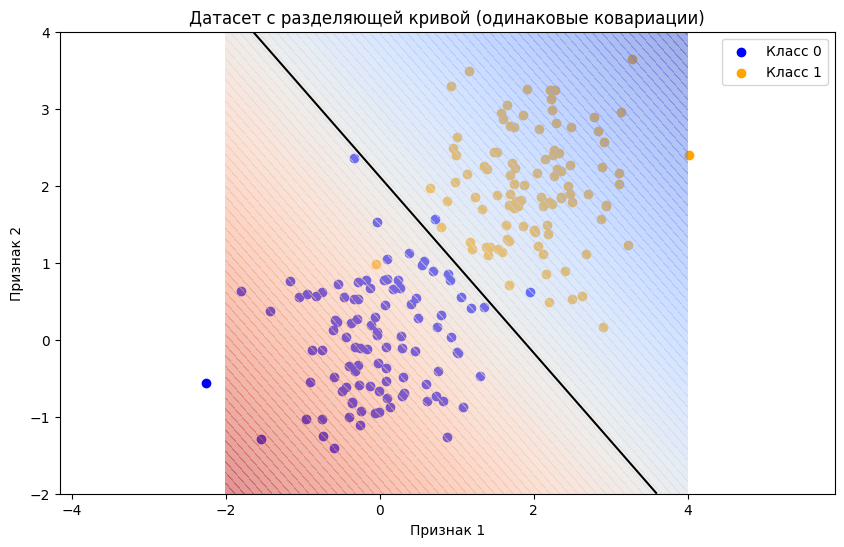

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Параметры
M = 200
mean0 = [0, 0]
mean1 = [2, 2]
cov = [[0.5, 0], [0, 0.5]]

# Генерация данных
class0 = np.random.multivariate_normal(mean0, cov, M // 2)
class1 = np.random.multivariate_normal(mean1, cov, M // 2)

# Средние значения и общая матрица ковариации
mu0 = np.mean(class0, axis=0)
mu1 = np.mean(class1, axis=0)
C = np.cov(np.vstack((class0, class1)).T)

# Создание сетки для вычисления логарифмов вероятностей
xx = np.linspace(-2, 4, 100)
yy = np.linspace(-2, 4, 100)
XX, YY = np.meshgrid(xx, yy)

# Вычисление вероятностей
pdf0 = multivariate_normal.pdf(np.dstack((XX, YY)), mean=mu0, cov=C)
pdf1 = multivariate_normal.pdf(np.dstack((XX, YY)), mean=mu1, cov=C)

# Разность логарифмов вероятностей
log_diff = np.log(pdf0) - np.log(pdf1)

# Визуализация
plt.figure(figsize=(10, 6))
plt.scatter(class0[:, 0], class0[:, 1], color='blue', label='Класс 0')
plt.scatter(class1[:, 0], class1[:, 1], color='orange', label='Класс 1')

# Фон в зависимости от разности логарифмов
plt.contourf(XX, YY, log_diff, levels=np.linspace(-5, 5, 100), cmap='coolwarm', alpha=0.5)

# Построение разделяющей кривой (нулевая разница)
plt.contour(XX, YY, log_diff, levels=[0], colors='black')

# Настройки графика
plt.title('Датасет с разделяющей кривой (одинаковые ковариации)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.axis('equal')
plt.show()


In [7]:
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.means = {}
        self.variances = {}
        self.priors = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            # Выбор данных для класса
            X_cls = X[y == cls]
            # Средние значения и дисперсии
            self.means[cls] = np.mean(X_cls, axis=0)
            self.variances[cls] = np.var(X_cls, axis=0)
            # Приоритеты
            self.priors[cls] = len(X_cls) / len(X)

    def predict(self, X):
        # Вычисление вероятностей для каждого класса
        posteriors = []
        for cls in self.classes:
            prior = np.log(self.priors[cls])
            likelihood = np.sum(np.log(self.gaussian_pdf(X, self.means[cls], self.variances[cls])))
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        # Предсказание класса с максимальной вероятностью
        return self.classes[np.argmax(posteriors, axis=0)]

    def gaussian_pdf(self, X, mean, variance):
        # Гауссовская вероятность
        coeff = 1 / np.sqrt(2 * np.pi * variance)
        exponent = np.exp(- (X - mean) ** 2 / (2 * variance))
        return coeff * exponent



LDA Metrics:
Accuracy: 0.7500
Precision: 0.7182
Recall: 0.8061

Naive Bayes Metrics:
Accuracy: 0.7950
Precision: 0.8000
Recall: 0.7755


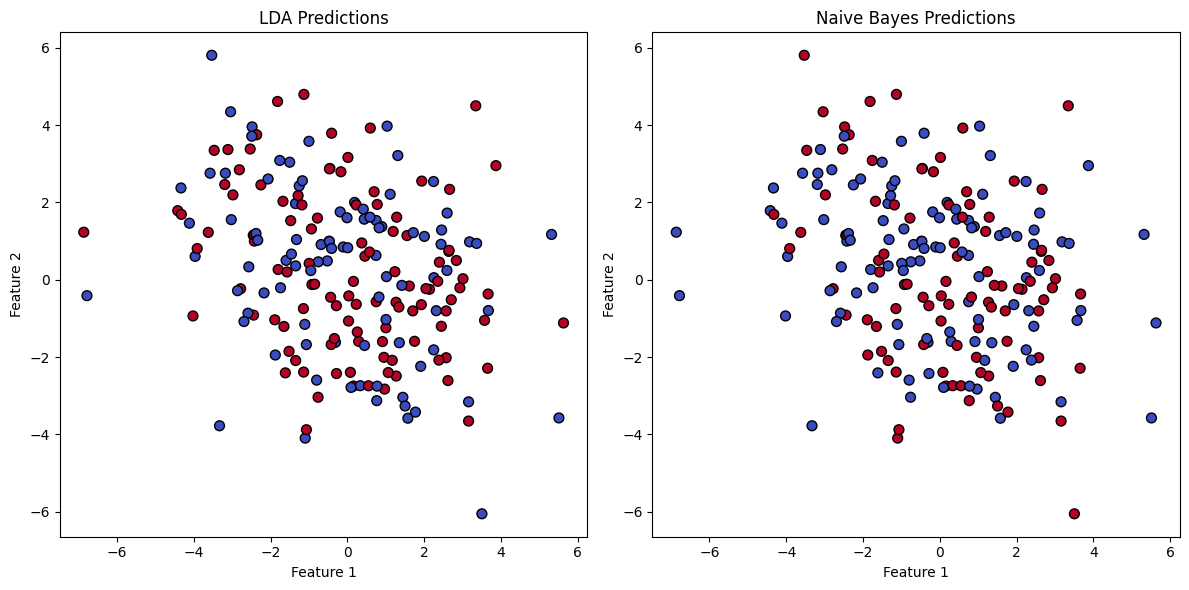

In [12]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import BaseEstimator

# Реализация LDA
class myLDA(BaseEstimator):
    def __init__(self):
        self.mu0 = None
        self.mu1 = None
        self.C_inv = None

    def fit(self, X, y):
        self.mu0 = np.mean(X[y == 0], axis=0)
        self.mu1 = np.mean(X[y == 1], axis=0)
        C = np.cov(X.T)
        self.C_inv = np.linalg.inv(C)

    def predict(self, X):
        threshold = 0.5 * (self.mu0 + self.mu1).dot(self.C_inv).dot(self.mu0 - self.mu1)
        predictions = np.dot(X, self.C_inv).dot(self.mu1 - self.mu0) >= threshold
        return predictions.astype(int)

# Реализация Naive Bayes
class myNB(BaseEstimator):
    def __init__(self):
        self.means = {}
        self.variances = {}
        self.priors = {}
        self.classes = None

    def fit(self, X, y):
        self.classes = np.unique(y)
        for cls in self.classes:
            X_cls = X[y == cls]
            self.means[cls] = np.mean(X_cls, axis=0)
            self.variances[cls] = np.var(X_cls, axis=0)
            self.priors[cls] = len(X_cls) / len(X)

    def predict(self, X):
        posteriors = []
        for cls in self.classes:
            prior = np.log(self.priors[cls])
            likelihood = np.sum(np.log(self.gaussian_pdf(X, self.means[cls], self.variances[cls])), axis=1)
            posterior = prior + likelihood
            posteriors.append(posterior)
        
        return self.classes[np.argmax(posteriors, axis=0)]

    def gaussian_pdf(self, X, mean, variance):
        coeff = 1 / np.sqrt(2 * np.pi * variance)
        exponent = np.exp(- (X - mean) ** 2 / (2 * variance))
        return coeff * exponent

# Создание датасета
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, n_classes=2, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение и тестирование LDA
lda_model = myLDA()
lda_model.fit(X_train, y_train)
y_pred_lda = lda_model.predict(X_test)

# Обучение и тестирование Naive Bayes
nb_model = myNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Метрики для LDA
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)

# Метрики для Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

# Вывод результатов
print("LDA Metrics:")
print(f"Accuracy: {accuracy_lda:.4f}")
print(f"Precision: {precision_lda:.4f}")
print(f"Recall: {recall_lda:.4f}")

print("\nNaive Bayes Metrics:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")

plt.figure(figsize=(12, 6))

# График для LDA
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_lda, cmap='coolwarm', edgecolor='k', s=50)
plt.title('LDA Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# График для Naive Bayes
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_nb, cmap='coolwarm', edgecolor='k', s=50)
plt.title('Naive Bayes Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

Выводы:

Метрики LDA:

Accuracy: показывает, насколько хорошо модель классифицирует данные в целом.

Precision: указывает, какова доля правильно предсказанных положительных классов к общему числу предсказанных положительных классов.

Recall: показывает, какую долю истинных положительных классов модель смогла правильно классифицировать.

Метрики Naive Bayes:

Аналогично, можно оценить accuracy, precision и recall.
Сравнивая метрики двух классификаторов, можно сделать выводы о том, какой из них работает лучше в данной задаче. На практике, результаты могут варьироваться в зависимости от характера данных, и может потребоваться дальнейшая настройка и выбор алгоритма.